In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [23]:
def predict(x,weight):
    y_hat = weight[0] + weight[1] * x
    return y_hat

def error(x,weight,y): # MSE
    N = x.shape[0]
    total_error = 0.0
    for val in range(N):
        y_hat = predict(x[val],weight)
        total_error+=(y[val]-y_hat)**2
    return total_error/N

def gradient(x,weight,y):
    N = x.shape[0]
    grad = np.zeros((2,))
    
    for val in range(N):
        y_hat = predict(x[val],weight)
        grad[0]+=(-2*(y[val]-y_hat))          #w0
        grad[1]+=(-2*(y[val]-y_hat)*(x[val])) #w1
        
    return grad/N


def gradient_descent(x,y,epochs=20,lr=1):
    weight = np.zeros((2,))
    error_list = []
    weight_list = []
    
    for val in range(epochs):
        grad = gradient(x,weight,y)
        
        err = error(x,weight,y)
        
        weight[0]-=lr*grad[0]
        weight[1]-=lr*grad[1]
        
        error_list.append(err)
        weight_list.append((weight[0],weight[1]))
    return weight,error_list,weight_list

In [24]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [25]:
y = df['selling_price']
x = df['year']

In [26]:
weight,error_list,weight_list = gradient_descent(x,y,lr=0.1)

In [28]:
print(weight)

[4.72784722e-16 3.86163272e-01]


In [29]:
print(error_list)

[1.0000000000000115, 0.945056444984272, 0.9098925697742103, 0.8873876896397609, 0.8729845663537364, 0.8637665674506576, 0.8578670481526972, 0.8540913558020099, 0.8516749126975591, 0.8501283891107219, 0.8491386140151277, 0.8485051579539641, 0.8480997460748059, 0.847840282472143, 0.8476742257664349, 0.847567949474802, 0.8474999326481532, 0.8474564018791069, 0.8474285421868968, 0.8474107119838816]


In [30]:
print(weight_list)

[(1.0544317969497452e-17, 0.07813347199626913), (5.5251240291083224e-17, 0.1406402495932848), (6.265870208605954e-17, 0.19064567167089674), (5.566463312265404e-17, 0.23065000933298624), (1.1636616101696773e-16, 0.2626534794626574), (1.428524301876922e-16, 0.28825625556639484), (1.4551651732448193e-16, 0.3087384764493847), (2.0760722438179783e-16, 0.3251242531557767), (1.8909529172901672e-16, 0.3382328745208903), (2.2499661064641104e-16, 0.3487197716129811), (2.573230338306279e-16, 0.3571092892866538), (3.1894657337909546e-16, 0.3638209034255919), (3.5076437774072924e-16, 0.3691901947367424), (3.7654373396640986e-16, 0.3734856277856628), (3.9644148486486336e-16, 0.37692197422479917), (4.284228538698829e-16, 0.37967105137610824), (4.533653416804323e-16, 0.38187031309715547), (4.731107309932663e-16, 0.38362972247399324), (4.782562954252575e-16, 0.3850372499754635), (4.727847220122714e-16, 0.3861632719766397)]


In [31]:
import matplotlib.pyplot as plt

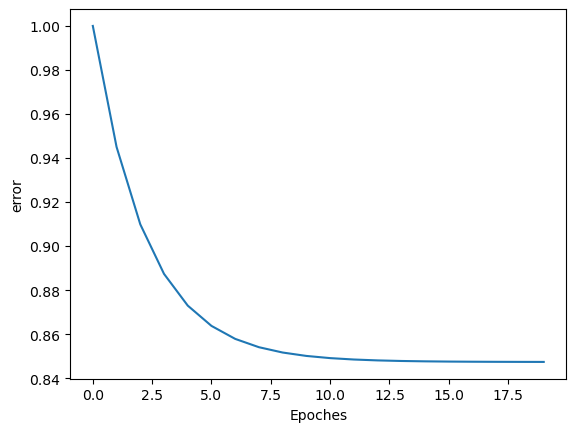

In [34]:
plt.plot(error_list)
plt.xlabel('Epoches')
plt.ylabel('error')
plt.show()